<a href="https://colab.research.google.com/github/rohailkhan/Deep-Learning-with-Python-Jb/blob/master/13_Object_Recognition_in_Photographs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Object Recognition in Photos**


In [1]:
# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10

In [2]:
# data processing and visualization libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.np_utils import to_categorical
# Keras deep learning model libraries
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization , Conv2D ,MaxPool2D 
from tensorflow.keras.optimizers import SGD ,Adam
# data validation lib
from sklearn.model_selection import KFold

In [3]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras import optimizers

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

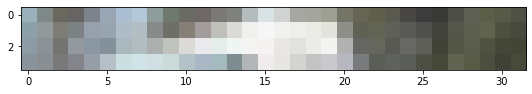

In [47]:
plt.imshow(X_train[1][0:4])

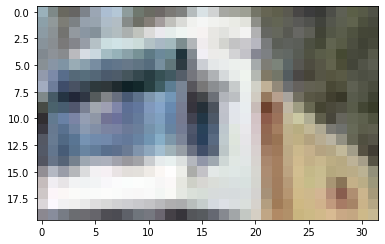

In [49]:
plt.imshow(X_train[1][0:20])

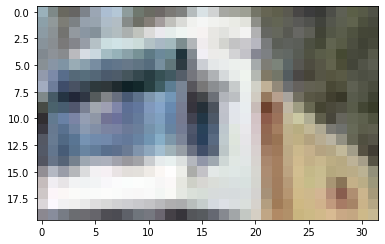

In [50]:
plt.imshow(X_train[1][0:20][0:25])

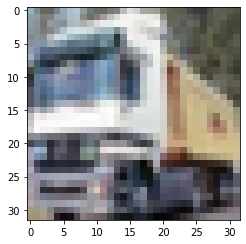

In [51]:
plt.imshow(X_train[1][0:32][0:32])

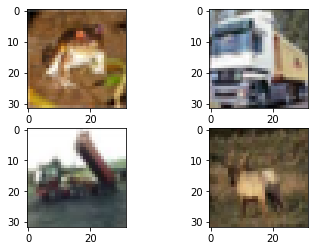

In [25]:
fig , ax =plt.subplots(2,2,figsize=(6,4))
for i in range(4):
  plt.subplot(220 + 1 +i)
  plt.imshow(X_train[i])

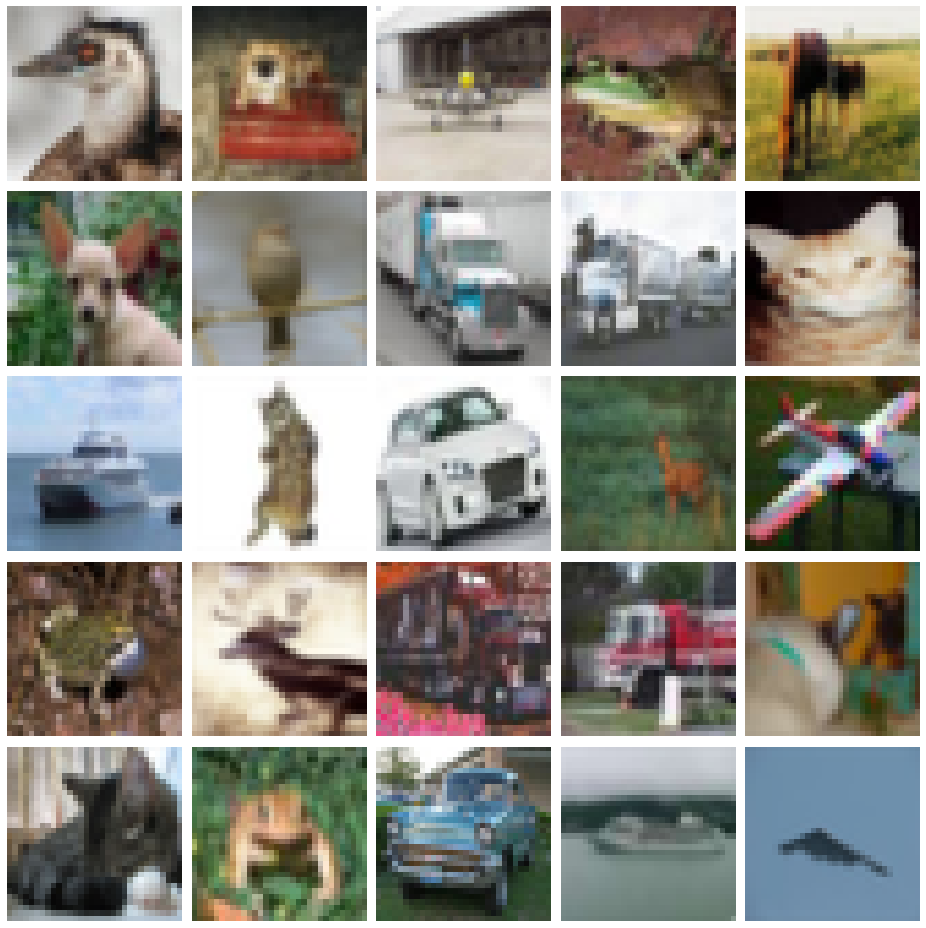

In [42]:
#Visualizing CIFAR 10
fig, axes1 = plt.subplots(5,5,figsize=(13,13))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X_train)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train[i:i+1][0])

In [ ]:
for i in range(8):
  axx[330 + 1 +i].imshow(X_train[i])

In [54]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Data Preprocessing

In [5]:
def data_processing(X_train, y_train, X_test, y_test):
  X_train=(X_train/255.0).astype('float')
  X_test=(X_test/255.0).astype('float')
  y_train=to_categorical(y_train)
  y_test=to_categorical(y_test)

  return X_train, y_train, X_test, y_test

In [55]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

# Base Model

In [11]:
from tensorflow.keras.constraints import max_norm

In [79]:
X_train, y_train, X_test, y_test=data_processing(X_train, y_train, X_test, y_test)

In [84]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [85]:
def base_model():
  model=Sequential()
  model.add(Conv2D(filters=32,kernel_size=(2,2), input_shape=(32,32,3),activation='tanh',kernel_constraint=max_norm(3.)))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=32,kernel_size=(2,2), activation='tanh',kernel_constraint=max_norm(3.)))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(units=512,activation='tanh'))
  model.add(Dropout(0.5))

  model.add(Dense(units=10,activation='softmax'))
  
  return model

# Training

In [86]:
model=base_model()

In [87]:
lr=0.01
epochs1=25
opt = SGD(learning_rate=lr,momentum=0.9,decay=lr/epochs1)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'] )
history=model.fit(X_train,y_train, epochs=epochs1,batch_size=32, validation_data=(X_test , y_test),verbose=2)
scores=model.evaluate(X_test , y_test)


Epoch 1/25
1563/1563 - 41s - loss: 1.5748 - accuracy: 0.4369 - val_loss: 1.3022 - val_accuracy: 0.5360
Epoch 2/25
1563/1563 - 41s - loss: 1.2668 - accuracy: 0.5522 - val_loss: 1.2122 - val_accuracy: 0.5674
Epoch 3/25
1563/1563 - 40s - loss: 1.1708 - accuracy: 0.5903 - val_loss: 1.1475 - val_accuracy: 0.6003
Epoch 4/25
1563/1563 - 40s - loss: 1.1106 - accuracy: 0.6142 - val_loss: 1.0783 - val_accuracy: 0.6246
Epoch 5/25
1563/1563 - 41s - loss: 1.0669 - accuracy: 0.6269 - val_loss: 1.0885 - val_accuracy: 0.6218
Epoch 6/25
1563/1563 - 41s - loss: 1.0397 - accuracy: 0.6366 - val_loss: 1.0533 - val_accuracy: 0.6309
Epoch 7/25
1563/1563 - 40s - loss: 1.0140 - accuracy: 0.6449 - val_loss: 1.0683 - val_accuracy: 0.6243
Epoch 8/25
1563/1563 - 41s - loss: 0.9969 - accuracy: 0.6525 - val_loss: 1.0527 - val_accuracy: 0.6292
Epoch 9/25
1563/1563 - 40s - loss: 0.9799 - accuracy: 0.6571 - val_loss: 0.9978 - val_accuracy: 0.6534
Epoch 10/25
1563/1563 - 40s - loss: 0.9657 - accuracy: 0.6620 - val_loss:

In [88]:
scores

[0.9317638874053955, 0.6783000230789185]

In [91]:
pd.DataFrame(data=history.history).head()

,loss,accuracy,val_loss,val_accuracy
0,1.574772,0.43690,1.302193,0.5360
1,1.266789,0.55220,1.212198,0.5674
2,1.170782,0.59028,1.147493,0.6003
3,1.110605,0.61416,1.078281,0.6246
4,1.066877,0.62688,1.088512,0.6218


In [6]:
def results_summary(history):
  history_1=history.history
  # keys of this dictionary
  acc = history_1['accuracy']
  val_acc = history_1['val_accuracy']
  loss = history_1['loss']
  val_loss = history_1['val_loss']

  # making X-axis as a range from 1 to the maximum number of ecpochs plus 1

  epochs=range(1 , len(acc) +1 )

  # plotting
  plt.plot(epochs, np.array(acc), 'r', label='Training acc')
  plt.plot(epochs, np.array(val_acc), 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'r', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()




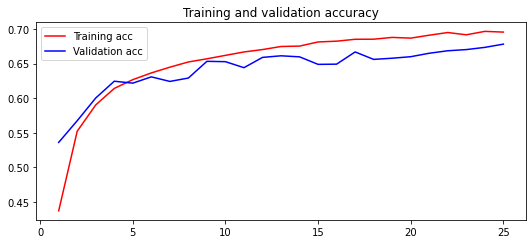

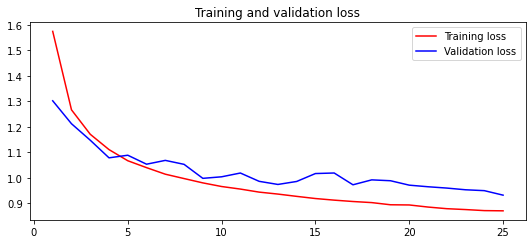

In [111]:
results_summary(history)

# **Making changes in the model to increase score**

In [9]:
def new_model():
  model=Sequential()
  model.add(Conv2D(filters=32,kernel_size=(2,2), input_shape=(32,32,3),activation='tanh',kernel_constraint=max_norm(3.)))
  model.add(Dropout(0.2))
  

  model.add(Conv2D(filters=32,kernel_size=(2,2), activation='tanh',kernel_constraint=max_norm(3.)))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Conv2D(filters=64,kernel_size=(2,2),activation='tanh',kernel_constraint=max_norm(3.)))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64,kernel_size=(2,2), activation='tanh',kernel_constraint=max_norm(3.)))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Conv2D(filters=128,kernel_size=(2,2),activation='tanh',kernel_constraint=max_norm(3.)))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=128,kernel_size=(2,2), activation='tanh',kernel_constraint=max_norm(3.)))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dropout(0.2))

  model.add(Dense(units=1024,activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(units=512,activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(units=10,activation='softmax'))
  
  return model

# Training new Model

In [7]:
X_train, y_train, X_test, y_test=data_processing(X_train, y_train, X_test, y_test)

In [12]:
model=new_model()

In [13]:
lr=0.01
epochs1=30
opt = SGD(learning_rate=lr,momentum=0.9,decay=lr/epochs1)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'] )
history=model.fit(X_train,y_train, epochs=epochs1,batch_size=32, validation_data=(X_test , y_test),verbose=2)
scores=model.evaluate(X_test , y_test)


Epoch 1/30
1563/1563 - 47s - loss: 1.6162 - accuracy: 0.4143 - val_loss: 1.2765 - val_accuracy: 0.5507
Epoch 2/30
1563/1563 - 18s - loss: 1.2552 - accuracy: 0.5548 - val_loss: 1.1164 - val_accuracy: 0.6062
Epoch 3/30
1563/1563 - 18s - loss: 1.1006 - accuracy: 0.6131 - val_loss: 1.1798 - val_accuracy: 0.5964
Epoch 4/30
1563/1563 - 18s - loss: 1.0053 - accuracy: 0.6463 - val_loss: 0.9909 - val_accuracy: 0.6598
Epoch 5/30
1563/1563 - 18s - loss: 0.9408 - accuracy: 0.6698 - val_loss: 0.9861 - val_accuracy: 0.6630
Epoch 6/30
1563/1563 - 18s - loss: 0.8948 - accuracy: 0.6874 - val_loss: 0.8965 - val_accuracy: 0.6949
Epoch 7/30
1563/1563 - 18s - loss: 0.8563 - accuracy: 0.7005 - val_loss: 0.8414 - val_accuracy: 0.7118
Epoch 8/30
1563/1563 - 18s - loss: 0.8201 - accuracy: 0.7130 - val_loss: 0.8796 - val_accuracy: 0.7028
Epoch 9/30
1563/1563 - 18s - loss: 0.7950 - accuracy: 0.7204 - val_loss: 0.8010 - val_accuracy: 0.7267
Epoch 10/30
1563/1563 - 17s - loss: 0.7715 - accuracy: 0.7308 - val_loss:

# **Saving Model & Training History(with acc & loss data )**

In [14]:
# saving model
import os

path=os.getcwd()
model_path=path +'/digits_model1.h5'
# saving model
model.save(model_path,overwrite=True)

# saving model history 

import json
# # Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history

# # Save it under the form of a json file
history_path=path +'/history_digits_model1.json'
json.dump(str(history_dict), open(history_path, 'w'))

# Make prediction

## 1- Take few images
Taking 6 images from the test data 

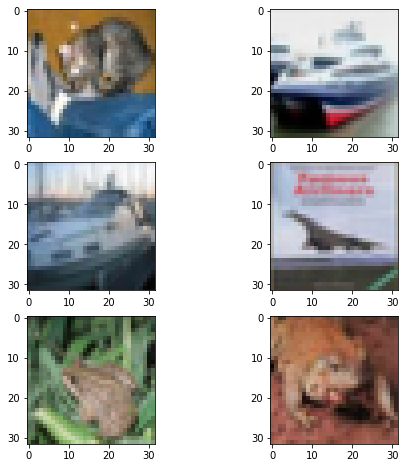

In [15]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
fig = plt.figure(figsize=(8,8))
for i in range(6):
	# define subplot
	plt.subplot(320 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_test[i])
# show the figure
plt.show()

## 2-Load the save model

In [16]:
from keras.models import load_model 
model_path=path +'/digits_model1.h5'
loaded_model = load_model(model_path) 

# Predict on the first 5 test images.
predictions = loaded_model.predict(X_test[:6])
# Print our model's predictions.
import numpy as np
print(np.argmax(predictions, axis=1)) # [3 8 8 0 6 6]


[3 8 8 0 6 6]


In [17]:
# Check our predictions against the ground truths.
print(np.argmax(y_test[:6],axis=1)) # the actual values are  [3 8 8 0 6 6]

[3 8 8 0 6 6]


# **Loading History of Accuracy and Losses of the Model**

In [18]:
history_path=path +'/history_digits_model1.json'
history= json.load(open(history_path, 'r'))

### The loaded history is in String format.Converting it back to dictionary

In [19]:
# The loaded history is in String format.Converting it back to
# dictionary
import ast
history_1=ast.literal_eval(history)

In [20]:
type(history_1)

dict

In [21]:
def results_summary(history):
  if type(history) !=dict:
    history_1=history.history
  else:
    history_1=history

  # keys of this dictionary
  acc = history_1['accuracy']
  val_acc = history_1['val_accuracy']
  loss = history_1['loss']
  val_loss = history_1['val_loss']

  # making X-axis as a range from 1 to the maximum number of ecpochs plus 1

  epochs=range(1 , len(acc) +1 )

  # plotting
  plt.plot(epochs, np.array(acc), 'green', label='Training acc')
  plt.plot(epochs, np.array(val_acc), 'red', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'r', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()




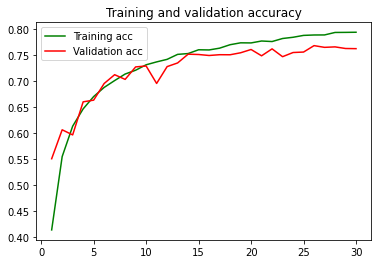

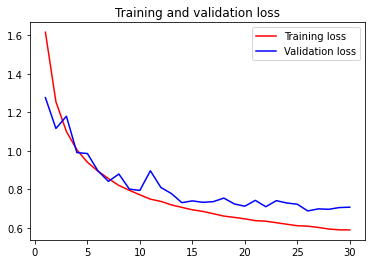

In [22]:
results_summary(history_1)